<a href="https://colab.research.google.com/github/gibiee/study_AI/blob/master/Machine%20Learning/2_Logistic_Regression(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
x_train = [[1., 2.],
           [2., 3.],
           [3., 1.],
           [4., 3.],
           [5., 3.],
           [6., 2.]]
y_train = [[0.],
           [0.],
           [0.],
           [1.],
           [1.],
           [1.]]       

x_test = [[5., 2.]]
y_test = [[1.]]
# 점(.)을 사용하지 않을 시, InvalidArgumentError 발생
# cannot compute MatMul as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:MatMul]

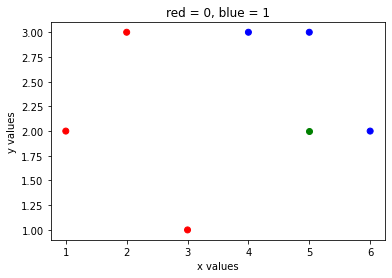

In [104]:
# 데이터에 대한 산점도
# 초록색 점이 0에 속하는지 1에 속하는지 판단하고자 하는 것이 목적.
import matplotlib.pyplot as plt
plot_x = [x[0] for x in x_train]
plot_y = [x[1] for x in x_train]
colors = ['r' if y[0] == 0 else 'b' for y in y_train]
plt.scatter(plot_x, plot_y, color=colors)
plt.scatter(x_test[0][0], x_test[0][1], color='g')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("red = 0, blue = 1")
plt.show()

In [0]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [0]:
# Logistic Regression 수식을 정의.
def logistic_regression(features) :
    hypothesis = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

# cost 구하는 수식을 정의.
def loss_fn(hypothesis, features, labels) :
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) +
                           (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

# 경사하강법을 정의. (한 번 하강)
def grad(features, labels) :
    with tf.GradientTape() as tape : 
        loss_value = loss_fn(logistic_regression(features), features, labels)
    return tape.gradient(loss_value, [W,b])

# 최종적으로 정답과 예측값의 정확도를 계산.
def accuracy_fn(hypothesis, labels) :
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

In [108]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
EPOCHS = 1000
for step in range(EPOCHS) :
    for features, labels in iter(dataset) :
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W,b]))
        if (step+1) % 100 == 0 :
            print(f"Step : {step+1}, Loss : {loss_fn(logistic_regression(features), features, labels):.4f}")

test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print(f"Testset Accuracy : {test_acc:.4f}")

Step : 100, Loss : 0.4067
Step : 200, Loss : 0.3993
Step : 300, Loss : 0.3923
Step : 400, Loss : 0.3855
Step : 500, Loss : 0.3790
Step : 600, Loss : 0.3728
Step : 700, Loss : 0.3667
Step : 800, Loss : 0.3609
Step : 900, Loss : 0.3552
Step : 1000, Loss : 0.3496
Testset Accuracy : 1.0000
